In [1]:
#Loaded the libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact
import ipywidgets as widgets

import seaborn as sns

import sklearn.datasets as data
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
#loading dataset

df=pd.read_csv("C:\\Users\\Manish\\Downloads\\DS3_C6_S1_Regression_Insurance_Data_Project.csv")
df

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,OB1,3,no,northwest,10600.54830
1334,18,female,31.920,OB1,0,no,northeast,2205.98080
1335,18,female,36.850,OB2,0,no,southeast,1629.83350
1336,21,female,25.800,PREO,0,no,southwest,2007.94500


In [3]:
#Checking null values
df.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
#Dropping columns

df=df.drop(['classif'],axis=1)

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,0,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
# Checking datatypes

df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df1=df.copy()         
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,0,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


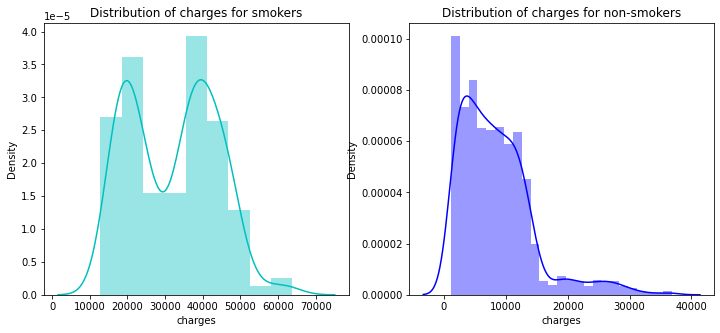

In [8]:
#Plotting the plot for Distribution of charges for smokers and non-smokers.

f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df1[(df1.smoker == "yes")]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df1[(df1.smoker == "no")]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')
plt.show()

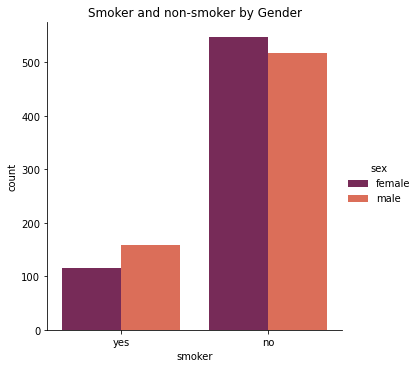

In [9]:
#Plotting the plot for Smoker and non-smoker by Gender

sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rocket", data=df1)
plt.title("Smoker and non-smoker by Gender")
plt.show()

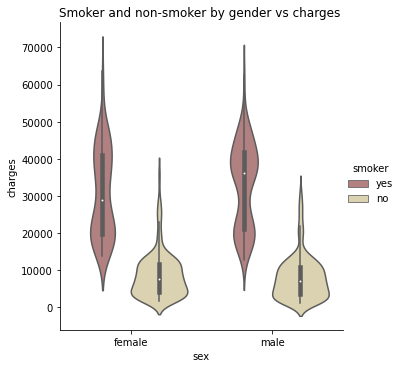

In [10]:
#plotting the plot for Smoker and non-smoker by gender vs charges

sns.catplot(x="sex", y="charges", hue="smoker",kind="violin", data=df1, palette = 'pink')
plt.title("Smoker and non-smoker by gender vs charges ")
plt.show()

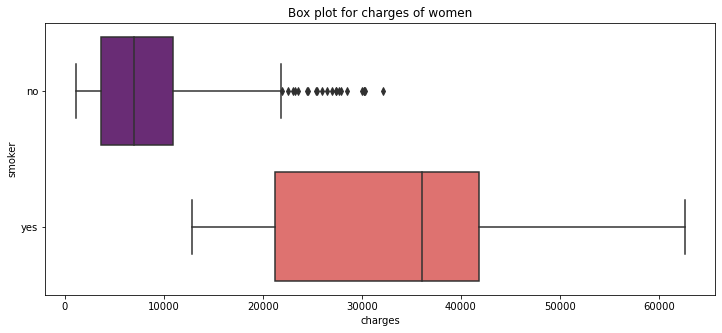

In [11]:
#plotting the plot for charges of women

plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df1[(df1.sex == "male")] , orient="h", palette = 'magma')
plt.show()

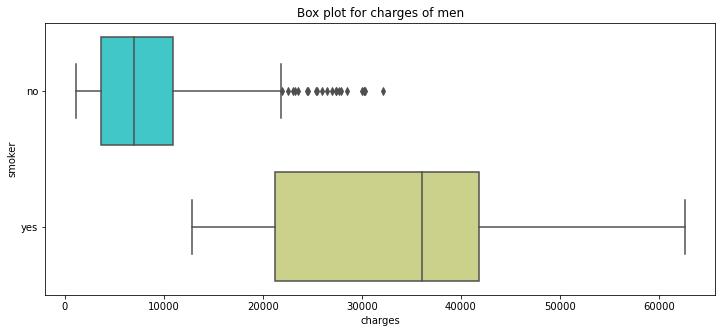

In [12]:
# plotting the plot for chargres of men

plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df1[(df1.sex == "male")] , orient="h", palette = 'rainbow')
plt.show()

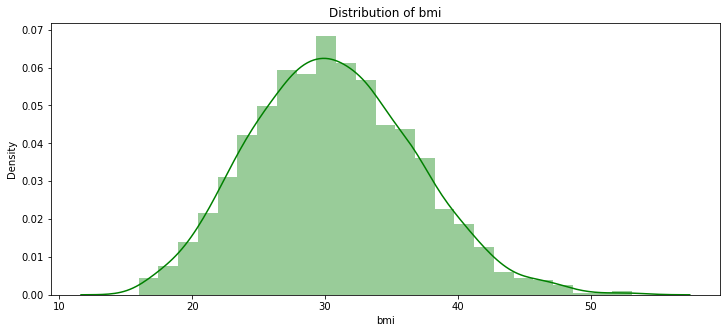

In [13]:
#plotting the plot for distribution of bmi

plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(df1["bmi"], color = 'g')
plt.show()

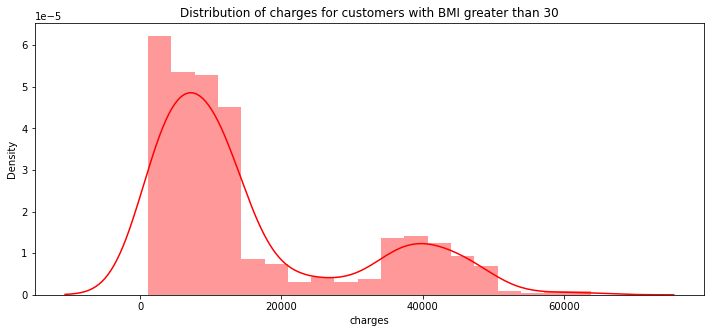

In [14]:
#plotting the plot for charges for customers with BMI greater than 30 

plt.figure(figsize=(12,5))
plt.title("Distribution of charges for customers with BMI greater than 30")
ax = sns.distplot(df1[(df1.bmi >= 30)]['charges'], color = 'r')
plt.show()

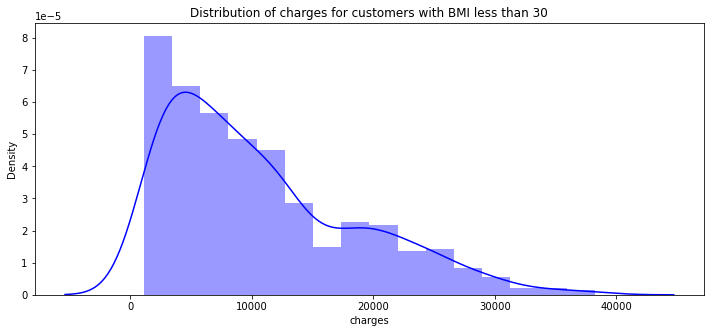

In [15]:
#plotting the plot for charges of customers with BMI less than 30

plt.figure(figsize=(12,5))
plt.title("Distribution of charges for customers with BMI less than 30")
ax = sns.distplot(df1[(df1.bmi < 30)]['charges'], color = 'b')
plt.show()

Patients with BMI above 30 spend more on treatment.

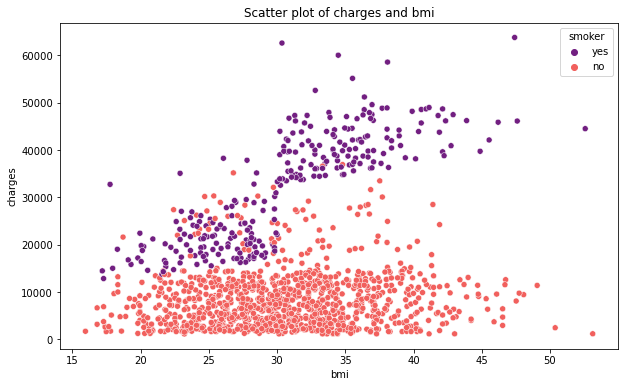

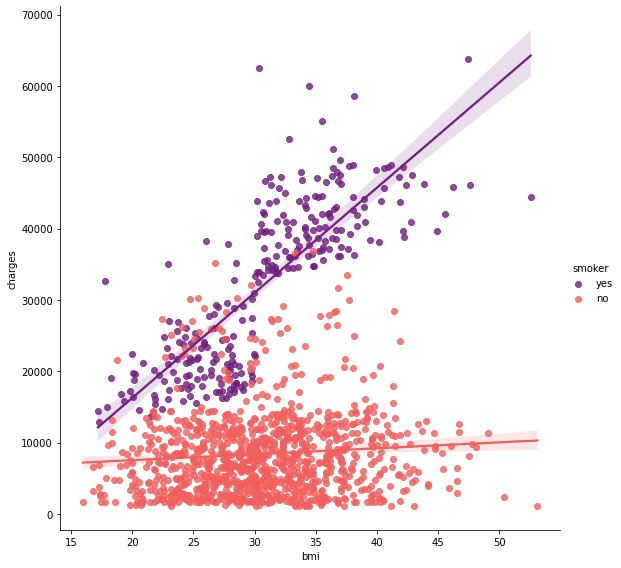

In [16]:
#plotting the plot for charges and bmi

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df1,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df1, palette = 'magma', size = 8)
plt.show()

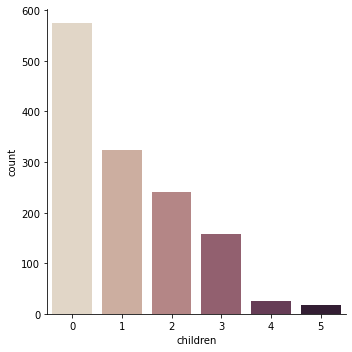

In [17]:
#number of children that customers have

sns.catplot(x="children", kind="count", palette="ch:.25", data=df1, size = 5)
plt.show()

Most patients do not have children.

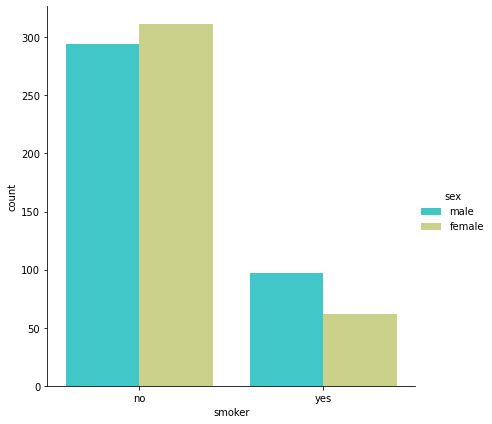

In [18]:
#plotting the plot for smokers and non-smokers who have childrens

sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",data=df1[(df1.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')
plt.show()

### Exploratory Data Analysis (EDA)

In [19]:
#checking data information

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
#replacing gender (Male, Female) with 0 and 1

df1['sex'] = df1['sex'].replace(['female'],0)
df1['sex'] = df1['sex'].replace(['male'],1)
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,0,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [21]:
#replacing region (northeast, northwest, southeast, southwest) with 1, 2, 3, 4

df1['region'] = df1['region'].replace(['northeast'],1)
df1['region'] = df1['region'].replace(['northwest'],2)
df1['region'] = df1['region'].replace(['southeast'],3)
df1['region'] = df1['region'].replace(['southwest'],4)
df1.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,4,16884.92400
1,18,1,33.770,1,no,3,1725.55230
2,28,1,33.000,3,no,3,4449.46200
3,0,1,22.705,0,no,2,21984.47061
4,32,1,28.880,0,no,2,3866.85520


In [22]:
#replacing smoker (yes, no) with 0, 1

df1['smoker'] = df1['smoker'].replace(['no'],0)
df1['smoker'] = df1['smoker'].replace(['yes'],1)
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,4,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,0,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


### univariate analysis

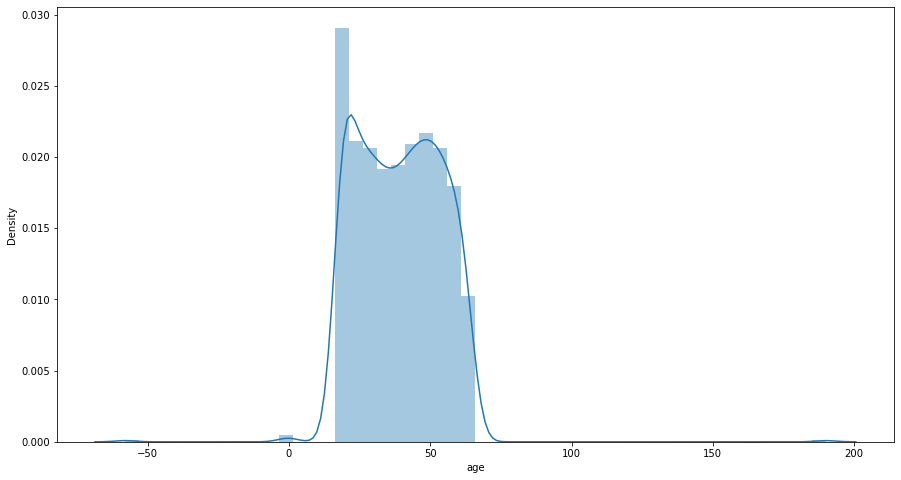

In [23]:
#plotting the plot for uivariate analysis

fig, ax = plt.subplots(figsize = (15, 8))
sns_plot = sns.distplot(df1["age"])

### Bivariate Analysis

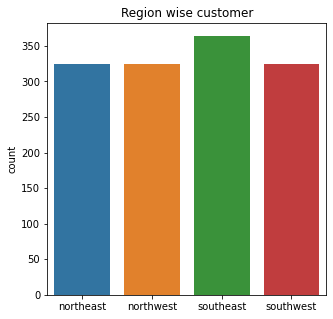

In [24]:
#plotting plot for bivariate analysis

fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df1.region.values, data=df1)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'northeast'
labels[1] = 'northwest'
labels[2] = 'southeast'
labels[3] = 'southwest'
ax.set_xticklabels(labels)
ax.set_title("Region wise customer")
plt.show()

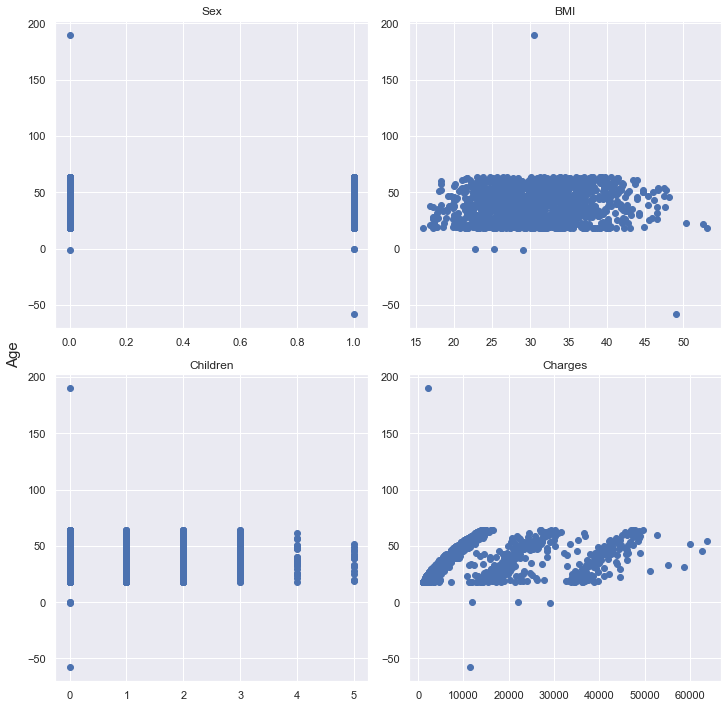

In [28]:
#plotting plot for Sex, BMI, Children. Charges and Age

f,axarr = plt.subplots(2,2, figsize=(10,10))
age = df1.age.values
axarr[0,0].scatter(df1.sex.values, age)
axarr[0,0].set_title('Sex')

axarr[0,1].scatter(df1.bmi.values, age)
axarr[0,1].set_title('BMI')

axarr[1,0].scatter(df1.children.values, age)
axarr[1,0].set_title('Children')


axarr[1,1].scatter(df1.charges.values, age)
axarr[1,1].set_title('Charges')

f.text(-0.01, 0.5, 'Age', va='center', rotation='vertical', fontsize = 15)
plt.tight_layout()
plt.show()


### Multi-variate Analysis

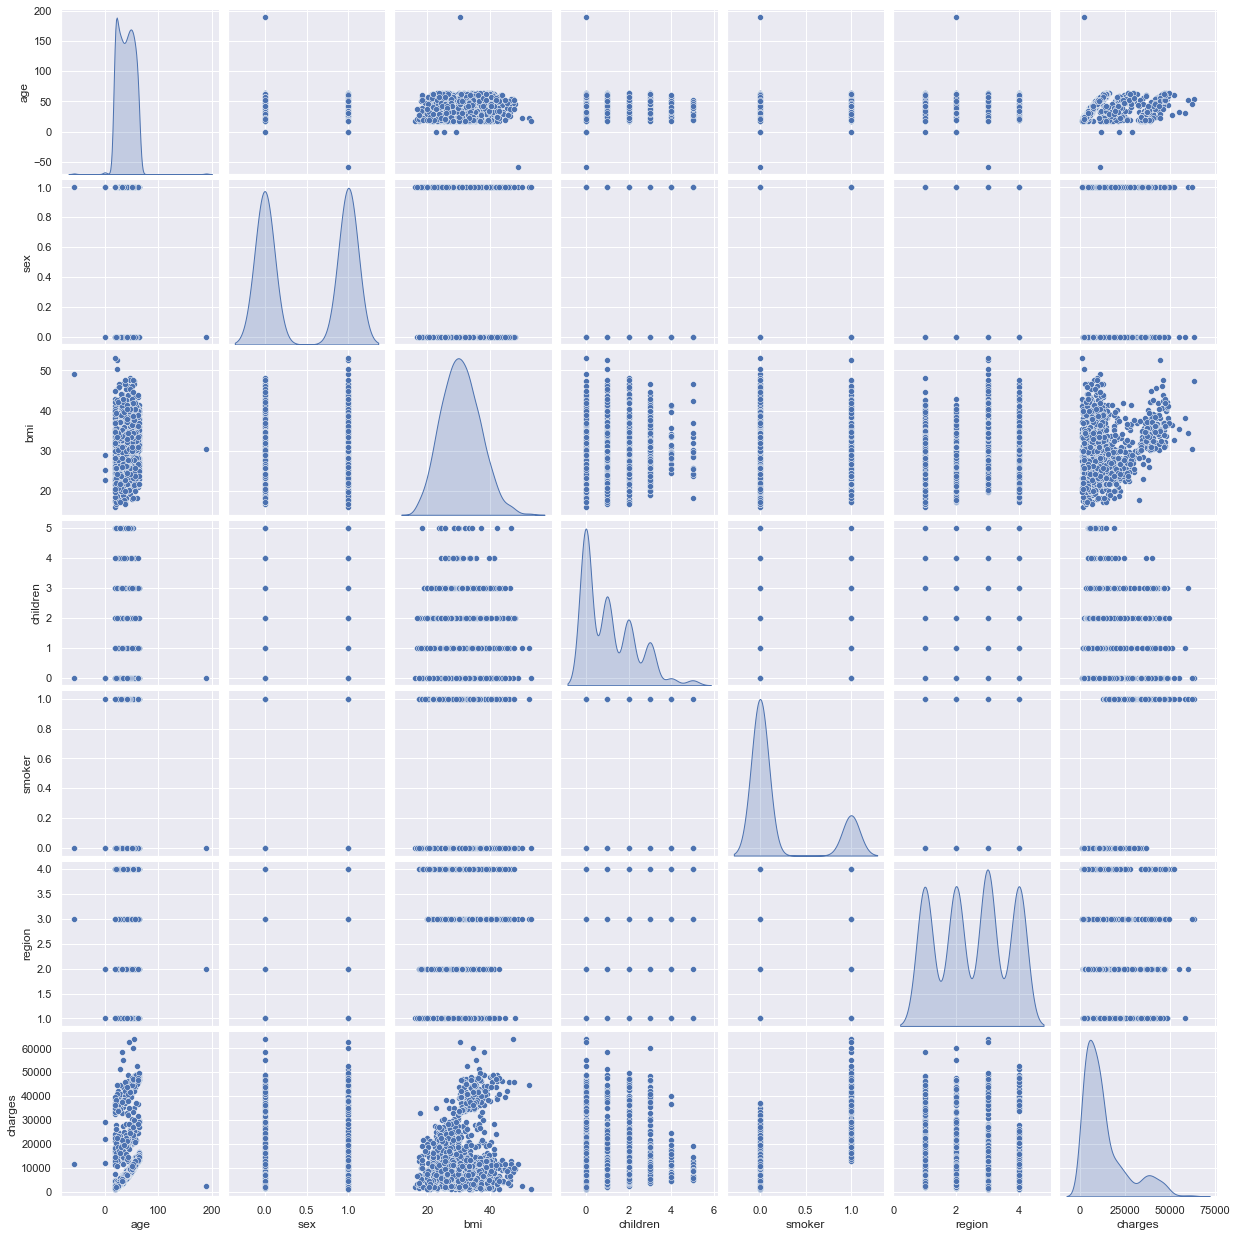

In [29]:
# to plot density curve instead of the histogram on the diagram # Kernel density estimation(kde)
# Multivariate analysis

sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df1.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   
plt.show()

### Distribution of numeric feature variable 

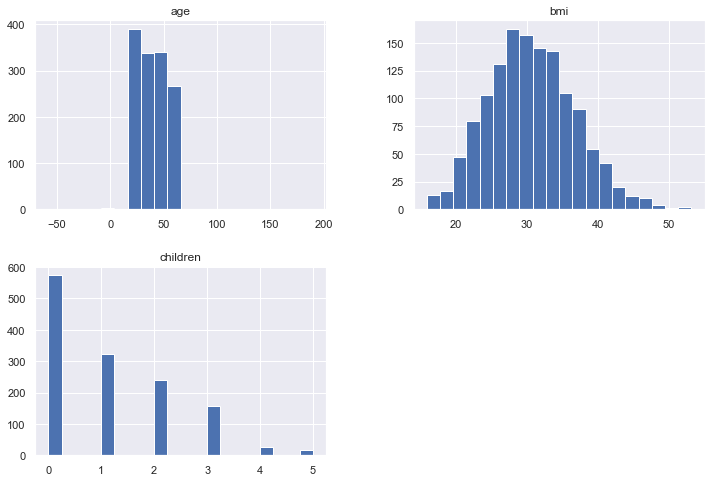

In [30]:
#plotting the plot for Age, BMI, Children

new_df=df[['age','bmi','children']]
new_df.hist(figsize=(12,8),bins=20)
plt.show()

In [31]:
#Correlation matrix

corr=df1.corr()

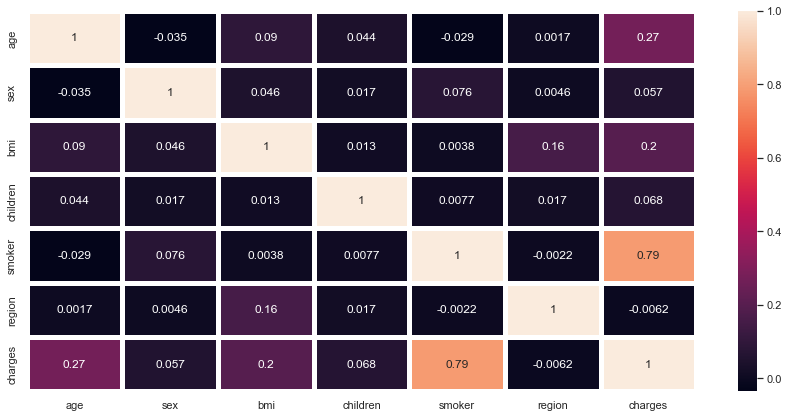

In [32]:
#Plotting plot for Correlation Matrix

fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(corr, annot = True,linewidth = 5)
plt.show()

### 1.Correlation between BMI and Charges is 0.2

### 2.Correlation between BMI and Age is 0.09

### 3.Correlation between Age and Charges is 0.27

### Distribution of target(charges) 

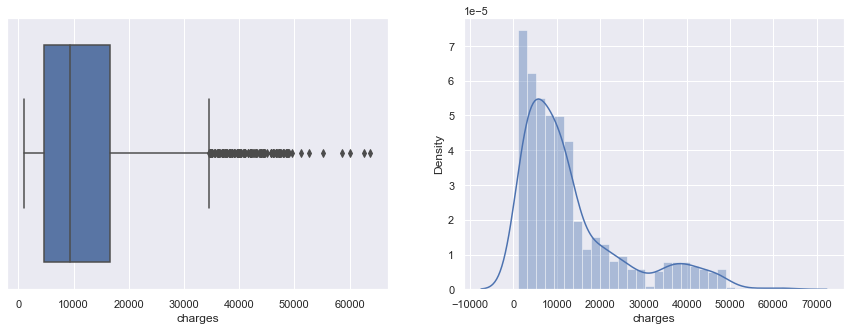

In [33]:
#plotting plot for Distribution of target(charges)

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot(x= df1['charges'],ax=ax[0])
sns.distplot(df1['charges'],ax=ax[1])                
plt.show()

### Correlation matrix for non-categorical features 

In [34]:
feat_df=df[['age','bmi','children']]

In [35]:
corr1=feat_df.corr()

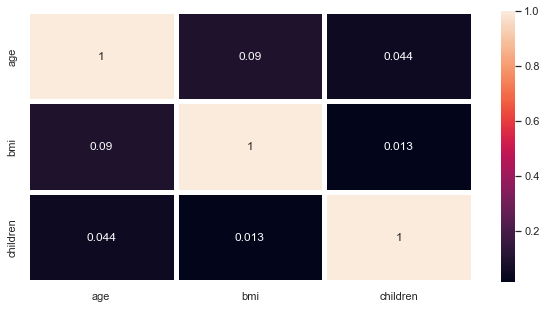

In [36]:
#plotting plot for correlation matrix for non-categorical features

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr1, annot = True,linewidth = 5)
plt.show()

### Standard Scaler

In [37]:
std_scaler = StandardScaler()
scale_columns = ['age','sex','bmi','children','smoker','region','charges']
df1[scale_columns] = std_scaler.fit_transform(df1[scale_columns])
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.346465,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584
1,-1.413341,0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689
2,-0.744582,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675
3,-2.617107,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843
4,-0.477078,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802


### MinMax Scaler

In [38]:
minmax=MinMaxScaler()
scale_columns = ['age','sex','bmi','children','smoker','region','charges']
df1[scale_columns]=minmax.fit_transform(df1[scale_columns])
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,0.310484,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.306452,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.346774,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,0.233871,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.362903,1.0,0.347592,0.0,0.0,0.333333,0.043816


In [39]:
df_numeric = df.select_dtypes('number')
df_numeric.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,0,22.705,0,21984.47061
4,32,28.880,0,3866.85520


### Linear Regression

In [40]:
X = df1.drop(['charges','region'], axis = 1)    #dropping charges column because it is a target column and after dropping charges column 
Y = df1.charges                                 #we have used it in y and in x only features columns are there



quad = PolynomialFeatures (degree = 2)       # polynomial provides the best approximation of the relationship between the dependent 
                                             #and independent variable. A braod range of function can be fit under it, Polynomial 
                                             #basically fits a wide range of curvature.
x_quad = quad.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_quad,Y, random_state = 0)

lr = LinearRegression()
lr.fit(X_train,y_train)

pred = lr.predict(X_test)


In [41]:
#Prediction values

pred

array([0.17290099, 0.14836196, 0.75221065, 0.2116923 , 0.11421686,
       0.06043677, 0.03885777, 0.19964669, 0.13440817, 0.09655485,
       0.09183329, 0.17415015, 0.12991615, 0.06576339, 0.38772314,
       0.18944049, 0.19088196, 0.06722795, 0.11539085, 0.42212334,
       0.40691382, 0.21890837, 0.15498809, 0.45766938, 0.04293099,
       0.07864449, 0.03154619, 0.14379022, 0.06273851, 0.14780959,
       0.14124113, 0.82970651, 0.21988955, 0.17320598, 0.1974323 ,
       0.06253366, 0.1504786 , 0.57156226, 0.56087409, 0.03926839,
       0.06192826, 0.06015527, 0.37740157, 0.74087193, 0.55807334,
       0.07345393, 0.18879825, 0.11684972, 0.06985763, 0.19152719,
       0.04219266, 0.07868311, 0.46646056, 0.71888364, 0.18022432,
       0.05445532, 0.04922505, 0.13911406, 0.13254594, 0.20780631,
       0.0409506 , 0.63106175, 0.24733603, 0.17551063, 0.17464708,
       0.16487145, 0.41074515, 0.54060036, 0.06406409, 0.13242491,
       0.20620612, 0.19892254, 0.3450895 , 0.22439055, 0.18900

In [42]:
#model score

score_lr = lr.score(X_train,y_train)
print(score_lr)

0.8267348403978948


In [43]:
#model coefficient 

lr.coef_

array([ 0.00000000e+00, -2.21709470e+00, -2.75817750e-03,  4.34158548e-02,
        4.81028966e-02,  2.00916164e-02,  3.88412475e+00,  1.07420090e-02,
        3.73437910e-01,  1.36519997e-01,  5.49510613e-02, -2.75817750e-03,
        6.07895823e-03, -2.22654844e-02, -1.04451009e-02, -2.30184635e-01,
        2.55965390e-02,  8.40360022e-01, -5.96489123e-02, -3.55016522e-02,
        2.00916164e-02])

In [44]:
#model interception

lr.intercept_

0.3274098866465587

In [47]:
#R^2 SCORE, MAE, MSE, MSRE

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print("R^2 Score :",metrics.r2_score(y_test, pred))
print("Mean Absolute Error :",mean_absolute_error(y_test,pred))
print("Mean Squared Error :",mean_squared_error(y_test,pred))
print("Mean Squared Root Error :",np.sqrt(metrics.mean_squared_error(y_test,pred)))

R^2 Score : 0.5564096617858908
Mean Absolute Error : 0.050123771870269805
Mean Squared Error : 0.017793440006015137
Mean Squared Root Error : 0.13339205375889202


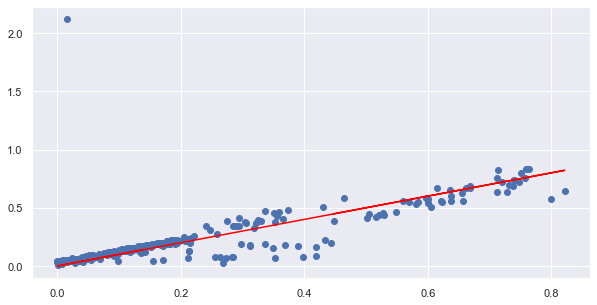

In [48]:
#PLOtting the plot for model

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='red')
plt.show()

### Decision Tree Regression

In [49]:
#Splittng the data into trian_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y, random_state = 0)

In [50]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth = 3,
                           min_samples_split = 5,
                           max_leaf_nodes = 15)

dtr.fit(X_train,y_train)
print("R-Squared on train dataset={}".format(dtr.score(X_test,y_test)))

dtr.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(dtr.score(X_test,y_test)))

R-Squared on train dataset=0.8705335642142634
R-Squared on test dataset=0.8967472026488845


In [51]:
#predicting the decision tree
pred = dtr.predict(X_test)

In [52]:
#prediction values
pred

array([0.15252755, 0.09355381, 0.70959546, 0.20697449, 0.15252755,
       0.04137443, 0.04137443, 0.15252755, 0.09355381, 0.09355381,
       0.09355381, 0.15252755, 0.09355381, 0.04137443, 0.27051186,
       0.15252755, 0.20697449, 0.09355381, 0.09355381, 0.58488663,
       0.36813992, 0.20697449, 0.15252755, 0.36813992, 0.04137443,
       0.09355381, 0.04137443, 0.09355381, 0.04137443, 0.09355381,
       0.09355381, 0.70959546, 0.20697449, 0.20697449, 0.27051186,
       0.04137443, 0.09355381, 0.58488663, 0.58488663, 0.04137443,
       0.04137443, 0.04137443, 0.27051186, 0.70959546, 0.58488663,
       0.09355381, 0.15252755, 0.09355381, 0.09355381, 0.20697449,
       0.04137443, 0.09355381, 0.36813992, 0.70959546, 0.20697449,
       0.04137443, 0.04137443, 0.15252755, 0.09355381, 0.20697449,
       0.04137443, 0.70959546, 0.20697449, 0.15252755, 0.09355381,
       0.15252755, 0.58488663, 0.58488663, 0.09355381, 0.09355381,
       0.20697449, 0.20697449, 0.27051186, 0.20697449, 0.20697

In [53]:
#model score

score_dtr = dtr.score(X_train,y_train)
print(score_lr)

0.8267348403978948


In [54]:
#R^2 SCORE, MAE, MSE, MSRE

print("R^2 Score :",metrics.r2_score(y_test, pred))
print("Mean Absolute Error :",mean_absolute_error(y_test,pred))
print("Mean Squared Error :",mean_squared_error(y_test,pred))
print("Mean Squared Root Error :",np.sqrt(metrics.mean_squared_error(y_test,pred)))

R^2 Score : 0.8967472026488845
Mean Absolute Error : 0.04230542060137377
Mean Squared Error : 0.004141709809363643
Mean Squared Root Error : 0.0643561171091268


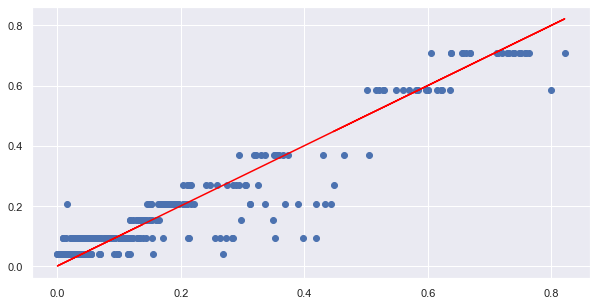

In [55]:
#plotting the plot for model

plt.figure(figsize=(10, 5))
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='red')
plt.show()

### Random Forest Regression

In [56]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(X_train,y_train)

RandomForestRegressor(criterion='mse', n_jobs=-1, random_state=1)

In [57]:
#predicting Random Forest

pred = forest.predict(X_test)

In [58]:
#prediction values

pred

array([0.14900152, 0.14187993, 0.69832964, 0.19173411, 0.13255238,
       0.06101127, 0.01655796, 0.16085079, 0.09552922, 0.0639618 ,
       0.10108263, 0.27049797, 0.15428119, 0.07158693, 0.38623779,
       0.18811367, 0.18843004, 0.03436548, 0.08432178, 0.5230486 ,
       0.36258581, 0.21274672, 0.15313377, 0.41705082, 0.02687186,
       0.06841444, 0.07748489, 0.11145407, 0.04150417, 0.13827262,
       0.1058342 , 0.75615969, 0.20417096, 0.16951503, 0.2572482 ,
       0.04602085, 0.12211229, 0.58720976, 0.61425268, 0.04276103,
       0.0694318 , 0.0411269 , 0.31026176, 0.73860439, 0.5694784 ,
       0.04277129, 0.19079296, 0.08664462, 0.0586437 , 0.1833406 ,
       0.03821625, 0.15346739, 0.40666079, 0.75758094, 0.17059732,
       0.13080648, 0.03654282, 0.14117943, 0.13124505, 0.26113106,
       0.00784321, 0.7332251 , 0.24101812, 0.26297401, 0.18300527,
       0.13902487, 0.52103049, 0.64052194, 0.06801919, 0.1553299 ,
       0.29565252, 0.16948849, 0.27608314, 0.20406752, 0.19184

In [59]:
#model score

score_for = forest.score(X_train,y_train)
print(score_for)

0.9726769443100534


In [60]:
#model interception

lr.intercept_                 

0.3274098866465587

In [61]:
#R^2 SCORE, MAE, MSE, MSRE

print("R^2 Score :",metrics.r2_score(y_test, pred))
print("Mean Absolute Error :",mean_absolute_error(y_test,pred))
print("Mean Squared Error :",mean_squared_error(y_test,pred))
print("Mean Squared Root Error :",np.sqrt(metrics.mean_squared_error(y_test,pred)))

R^2 Score : 0.865961450427518
Mean Absolute Error : 0.042458478278191686
Mean Squared Error : 0.005376597921210953
Mean Squared Root Error : 0.07332528841546382


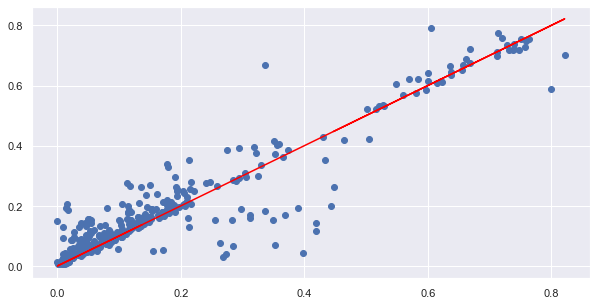

In [62]:
#plotting the plot for model

plt.figure(figsize=(10, 5))
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='red')
plt.show()

## CONCLUSION:

### We performed different models and found that, Linear Reggression predicts with 55% accuracy, Random Forest predicts with 86% accuracy and Decision Tree predict with 89% accuracy.


### As we can see here that Decision Tree Regression model/algorithm is the best model here with the score of 89% accuracy.